In [63]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

## Positive semidefinite matrix

สร้าง positive semidefinite matrix (psdf) โดยทำการสร้าง symmetric matrix ขึ้นมาก่อน (จาก $x^TPP^Tx = (P^Tx)(P^Tx) = \|P^Tx\|_2 ≥ 0$) หลังจากนั้น จะนำ matrix นั้นไปลบกับ diagonal matrix ที่ถูก scale โดยค่า eigenvalue ที่ต่ำที่สุดของ symmetric matrix นั้น ซึ่งจาก $ eig(A+αI) = eig(A) + α$ จะทำให้ได้ positive semidefinite ที่มีค่า eigenvalue 1 ตัวเป็น 0 

random matrix = 
 [[0.15416284 0.7400497 ]
 [0.26331502 0.53373939]]
eigenvalue of symmetric matrix [0.91175041 0.01390186]
eigenvalue of psdf matrix [0.89784856 0.        ]
null space of psdf matrix [[-0.61565335]
 [ 0.7880171 ]]
psdf matrix = 
 [[0.55753788 0.43558707]
 [0.43558707 0.34031068]]


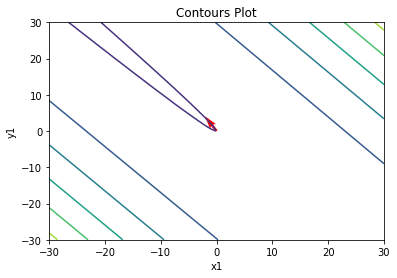

In [64]:
# generate positive semidefinite matrix
np.random.seed(12)
M = np.random.rand(2,2)
print('random matrix = \n', M )
sym = np.matmul(M,M.T)
[eig_value, eig_vector] = np.linalg.eig(sym)
print('eigenvalue of symmetric matrix', eig_value)
psdf = sym + (-(abs(min(eig_value))) * np.eye(2))
[eig_value, eig_vector] = np.linalg.eig(psdf)
ns = null_space(psdf)
print('eigenvalue of psdf matrix', eig_value)
print('null space of psdf matrix', ns)
print('psdf matrix = \n', psdf)

xlist = np.linspace(-30.0, 30.0, 100)
ylist = np.linspace(-30.0, 30.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/2 * (psdf[0,0]*X**2 + 2*psdf[0,1]*np.multiply(X,Y) + psdf[1,1]*Y**2) + 0.1*X
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)

origin = np.array([[0],[0]]) # origin point
ns = 3 * ns
plt.quiver(*origin, ns[0], ns[1], color=['r'])
# Add a colorbar to a plot
ax.set_title('Contours Plot')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
plt.show()

สำหรับกรณีที่ $P ≽ 0$ โดย 
  $$ f(x) = \frac{1}{2}(x^TPx) + q^Tx$$ 
จะพบว่าเมื่อแทนให้ $x⊂ 𝒩(P)$ จะพบว่าจะได้
  $$ f(x) = q^Tx $$ 
สำหรับในตัวอย่างที่สุ่มขึ้นมาเมื่อแทนให้ $ x = t(0.308, -0.951), q = (0.1,0)$ จะพบว่าค่า $$ f(x) = t*(0.308)$$ 
ซึ่งเมื่อเราปรับค่า t จะทำให้ค่าของ f(x) ไม่มีขอบเขตล่าง (unbounded below) และไม่มีขอบเขตบนซึ่งเราสามารถสังเกตได้จาก contour plot ที่ไม่มีจุดต่ำสุด

[[4.]
 [0.]]


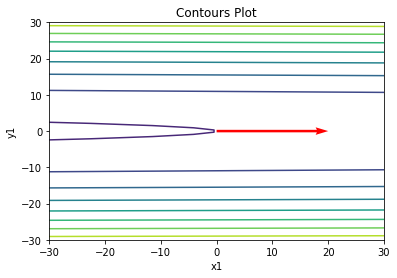

In [65]:
# another example
psdf = np.array([[0 ,0], [0, 1]])
xlist = np.linspace(-30.0, 30.0, 100)
ylist = np.linspace(-30.0, 30.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/2 * (psdf[0,0]*X**2 + 2*psdf[0,1]*np.multiply(X,Y) + psdf[1,1]*Y**2) + 0.1*X
ns = null_space(psdf)
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)

origin = np.array([[0],[0]]) # origin point
ns = 4 * ns
print(ns)
plt.quiver(*origin, ns[0], ns[1], color=['r'], scale = 12)
# Add a colorbar to a plot
ax.set_title('Contours Plot')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
plt.show()

## Indefinite Matrix

สำหรับ indefinte matrix จะสร้างโดยให้ eigenvalue มีทั้งค่าบวกและค่าลบ และให้ $ f(x) = \frac{1}{2} x^TPx $

ในกรณีที่ $ x = tv $ ซึ่ง $ Px = λv $ โดย $ v $ คือ eigenvector และ $ λ $ คือ eigenvalue ที่สัมพันธ์กับ eigenvector เมื่อนำ $x$ ไปแทนใน $f(x)$ จึงได้

$$ f(x) = \frac{1}{2}x^TPx = \frac{1}{2}t^2λ v^Tv = \frac{1}{2} t^2λ \|v\|^{2}_2 $$

จะเห็นว่าเมื่อแทน $x$ ด้วย eigenvector ที่สัมพันธ์กับ eigenvalue ที่มีค่าติดลบจะทำให้ $f(x)$ มีคุณสมบัติ unbounded below ในบางทิศทางของ $x$
จาก contour plot จะเห็นว่ามีทิศทางที่ทำให้ค่า f(x) เพิ่มขึ้น และทิศทางที่ทำให้ f(x) นี้ลดลงซึ่งแต่ละทิศทางก็จะสัมพันธ์กับค่า eigenvector ที่มีค่า eigenvalue เป็นบวกและลบ


random matrix = 
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
eigenvalue of symmetric matrix [0.76338386 0.02079587]
eigenvalue of indefinite matrix [ 0.64258799 -0.1       ]
eigenvector of indefinite matrix [[ 0.9512701  -0.30835888]
 [ 0.30835888  0.9512701 ]]
indefinite matrix = 
 [[ 0.57197886  0.21782525]
 [ 0.21782525 -0.02939087]]


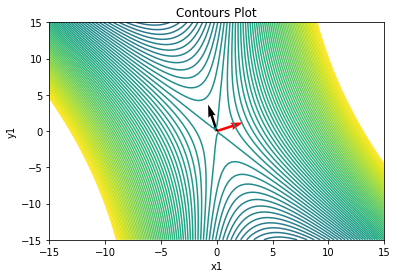

In [68]:
# generate indefinite matrix
np.random.seed(1)
M = np.random.rand(2,2)
print('random matrix = \n', M )
sym = np.matmul(M,M.T)
[eig_value, eig_vector] = np.linalg.eig(sym)
print('eigenvalue of symmetric matrix', eig_value)
indef = sym + (-((abs(min(eig_value)))+0.1) * np.eye(2))
[eig_value, eig_vector] = np.linalg.eig(indef)
print('eigenvalue of indefinite matrix', eig_value)
print('eigenvector of indefinite matrix', eig_vector)
print('indefinite matrix = \n', indef)


xlist = np.linspace(-15.0, 15.0, 100)
ylist = np.linspace(-15.0, 15.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/2 * (indef[0,0]*X**2 + 2*indef[0,1]*np.multiply(X,Y) + indef[1,1]*Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z, levels=range(-50,50,1))

origin = np.array([[0],[0]]) # origin point
vec1 = [eig_vector[0,0], eig_vector[1,0]]
plt.quiver(*origin, vec1[0], vec1[1], color=['r'],scale=12)

vec2 = [eig_vector[0,1], eig_vector[1,1]]
plt.quiver(*origin, vec2[0], vec2[1], color=['k'],scale=12)


# Add a colorbar to a plot
ax.set_title('Contours Plot')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
plt.show()

## Positive definite marix

สำหรับกรณี $ P ≻ 0 $ เมื่อให้ $ f(x) = \frac{1}{2} x^TPx + q^Tx$ แล้วจะพบว่าจาก second order sufficient condition ซึ่งก็คือถ้า $∇f(x^*) = 0$ และ $ ∇^2f(x^*) ≻ 0 $ แล้วจะทำให้ $x^*$ นั้นเป็นจุด local minimizer 

จาก $ ∇f(x) = Px + q, ∇^2f(x) = P $ จะพบว่าเมื่อ $ x^* = -P^{-1}q $ จะทำให้ $∇f(x^*) = 0 $ และ $∇^2f(x^*) = P ≻ 0$ ดังนั้นที่จุด $x$ นี้เป็นจุด local minimizer

และจาก taylor series expansion 
$$ f(x) = f(x^*) + ∇f(x^*)^T(x-x^*) + \frac{1}{2} (x-x^*)^T ∇^2f(x^*) (x-x^*) $$
จาก $∇f(x^*) = 0$ จึงได้
$$ f(x) = f(x^*) + \frac{1}{2} (x-x^*)^T ∇^2f(x^*) (x-x^*)$$
จาก $ ∇^2f(x^*) = P ≻ 0 $ ดังนั้น $x^TPx > 0$ จึงจะได้
$$ f(x^*) < f(x) $$

ดังนั้นจึงสรุปได้ว่่า $x^*$ เป็น global minimizer

random matrix = 
 [[0.51394334 0.77316505]
 [0.87042769 0.00804695]]
eigen value of psdf matrix [1.26637085 0.35326021]
eigen value of pdf matrix [1.62963107 0.71652043]
pdf matrix = 
 [[1.22518217 0.45357213]
 [0.45357213 1.12096932]]
Global minimizer is located at x = [[-7.65788185]
 [-1.36185545]]


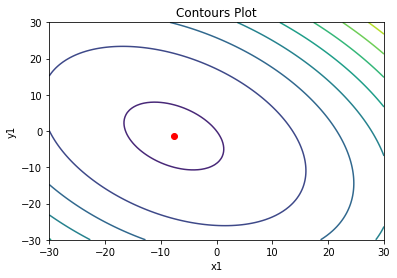

In [97]:
# generate positive definite matrix
np.random.seed(14)
M = np.random.rand(2,2)
print('random matrix = \n', M )
psdf = np.matmul(M,M.T)
[eig_value, eig_vector] = np.linalg.eig(psdf)
print('eigen value of psdf matrix', eig_value)
pdf = psdf + ((abs(min(eig_value)) + 0.01) * np.eye(2))
[eig_value, eig_vector] = np.linalg.eig(pdf)
print('eigen value of pdf matrix', eig_value)
print('pdf matrix = \n', pdf)
q = np.array([[10],[5]])

xlist = np.linspace(-30.0, 30.0, 100)
ylist = np.linspace(-30.0, 30.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/2 * (pdf[0,0]*X**2 + 2*pdf[0,1]*np.multiply(X,Y) + pdf[1,1]*Y**2) + q[0]*X + q[1]*Y
x_min = -np.matmul(np.linalg.inv(pdf),np.array([[10],[5]]))
print('Global minimizer is located at x =', x_min)
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)
plt.scatter(x_min[0], x_min[1], c='r')
# Add a colorbar to a plot
ax.set_title('Contours Plot')
ax.set_xlabel('x1')
ax.set_ylabel('y1')
plt.show()

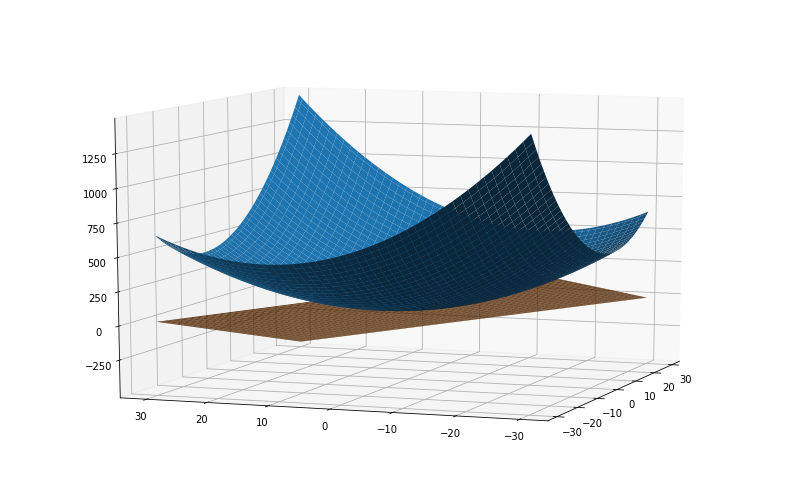

In [70]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X, Y, Z)
x01 = np.array([[-10], [-10]])
g1 = np.matmul(pdf, x01);
f01 = 1/2 * (np.matmul(x01.T,g1) + g1[0]*(X - x01[0]) + g1[1]*(Y-x01[1]))
ax.plot_surface(X, Y, f01)

ax.view_init(10, 200)
# show plot
plt.show()

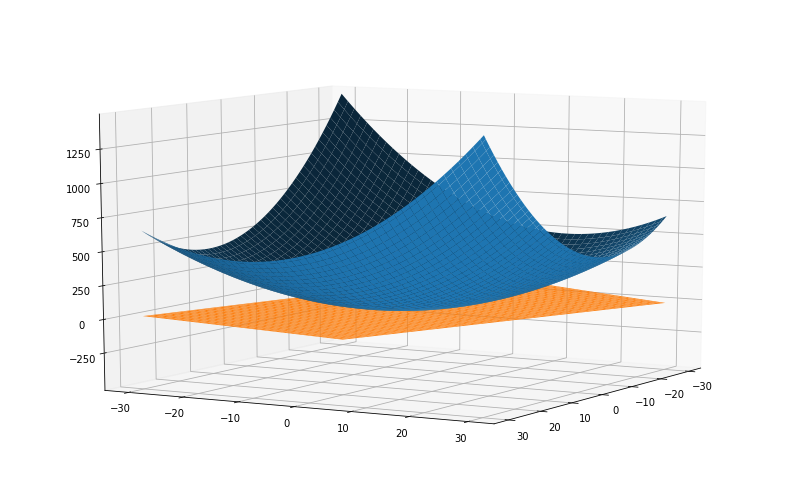

In [71]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X, Y, Z)

x02 = np.array([[10], [10]])
g2 = np.matmul(pdf, x02);
f02 = 1/2 * (np.matmul(x02.T,g2) + g2[0]*(X - x02[0]) + g2[1]*(Y-x02[1]))
ax.plot_surface(X, Y, f02)

ax.view_init(10, 30)
# show plot
plt.show()

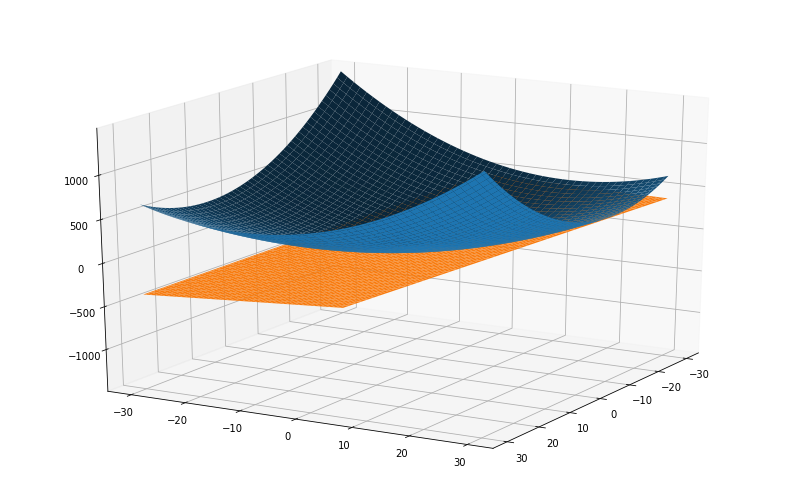

In [72]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X, Y, Z)

x02 = np.array([[10], [50]])
g2 = np.matmul(pdf, x02);
f02 = 1/2 * (np.matmul(x02.T,g2) + g2[0]*(X - x02[0]) + g2[1]*(Y-x02[1]))
ax.plot_surface(X, Y, f02)

ax.view_init(20, 30)
# show plot
plt.show()

จาก $$ f(x) = \frac{1}{2}x^TPx, ∇f(x) = Px, ∇^{2}f(x)=P, P ≻ 0 $$ 


และเมื่อ f(x) เมื่อกระจาย taylor series รอบจุด $x_{0}$ จะได้ 
$$ f(x) = f(x_0) + ∇f(x_0)^T(x-x_0) + \frac{1}{2} (x-x_0)^T ∇^2f(x_0) (x-x_0) $$
จึงได้
$$ f(x) - \frac{1}{2} (x-x_0)^T ∇^2f(x_0) (x-x_0) = f(x_0) + ∇f(x_0)^T(x-x_0) $$ 

ซึ่งจาก P เป็น positive definite matrix $( x^TPx > 0)$ ดังนั้น 
$$ f(x) > f(x_0) + ∇f(x_0)^T(x-x_0) $$ 

จึงสามารถสรุปได้ว่า tangent plane ของ $f(x)$ ที่จุด $x_0$ จะอยู่ข้างล่าง surface plot ของ f(x) เสมอ
